In [1]:
#import dependencies
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
html = browser.html
soup = bs(html, 'html.parser')

In [5]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')

In [6]:
df[0]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
mars_table = df[0]

In [8]:
mars_table.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
mars_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [11]:
mars_table['terrestrial_date'] = pd.to_datetime(mars_table['terrestrial_date']) 

In [12]:
mars_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [23]:
#1.Answer the following question: How many months exist on Mars?
total_months = mars_table['month'].unique()
print(f'number of months:  {total_months}')
#12 months 

number of months:  [ 6  7  8  9 10 11 12  1  2  3  4  5]


In [30]:
#2.Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
total_days = mars_table['sol'].max()
print(f'There are {total_days} Martian days worth of data')


There are 1977 Martian days worth of data


In [34]:
#3.Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?
    #Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.
min_temps = mars_table.groupby('month')['min_temp'].mean()
min_temps

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Coldest month: March (3)
Warmest month: August (8)


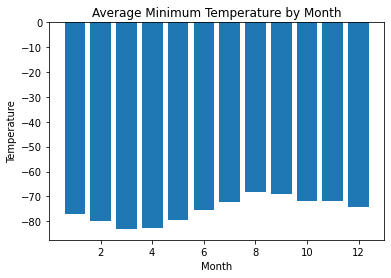

In [38]:
temp = [-77.160920, -79.932584, -83.307292, -82.747423, -79.308725, -75.299320, -72.281690, -68.382979, -69.171642, -71.982143, -71.985507, -74.451807]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.bar(month, temp)
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
print('Coldest month: March (3)')
print('Warmest month: August (8)')

In [39]:
#4.Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
    #Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
min_press = mars_table.groupby('month')['pressure'].mean()
min_press

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Lowest Pressure month: June (6)
Highest Pressure month: September (9)


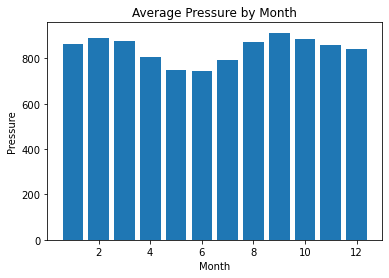

In [41]:
pressure = [862.488506, 889.455056, 877.322917, 806.329897, 748.557047, 745.054422, 795.105634, 873.829787, 913.305970, 887.312500, 857.014493, 842.156627]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.bar(month, pressure)
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
print('Lowest Pressure month: June (6)')
print('Highest Pressure month: September (9)')

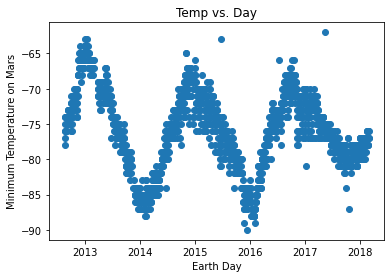

A Martian year is about 700 Earth days


In [44]:
#5.Answer the following question: About how many terrestrial (Earth) days exist in a Martian year? 
    #That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
    #Visually estimate the result by plotting the daily minimum temperature.
x_axis = mars_table['terrestrial_date']
y_axis = mars_table['min_temp']
plt.scatter(x_axis, y_axis, marker='o')
plt.title('Temp vs. Day')
plt.xlabel('Earth Day')
plt.ylabel('Minimum Temperature on Mars')
plt.show()
print('A Martian year is about 700 Earth days')

In [45]:
mars_table.to_csv('mars_data_part_2.csv')